In [28]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
## 图像显示中文的问题
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import seaborn as sns
sns.set(font= "Kaiti",style="ticks",font_scale=1.4)
import pandas as pd
pd.set_option("max_colwidth", 200)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,label_binarize
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
## 忽略提醒
import warnings
warnings.filterwarnings("ignore")

In [29]:
train = pd.read_csv('./随机森林数据集2.csv')

In [30]:
train.columns

Index(['number', 'lable', 'name', 'length', 'width', 'height', 'length/width',
       'height/length', 'width/height', 'AvgCurvature', 'Ellipticity',
       'Sphericity'],
      dtype='object')

In [31]:
# 将字符串类型的分类变量进行重新编码
label = LabelEncoder()
train["lable"] = label.fit_transform(train["lable"])
train["name"] = label.fit_transform(train["name"])

In [32]:
# 定于预测目标变量名
Target = ["lable"]

In [33]:
## 定义模型的自变量名
train_x = ["length", "width", "height", "length/width", "height/length", "width/height","AvgCurvature","Sphericity","Ellipticity"]

In [34]:
##将训练集切分为训练集和验证
X_train,X_val,y_train,y_val = train_test_split(train[train_x], train[Target],test_size = 0.15,random_state = 2)

In [35]:
print("X_train.shape :",X_train.shape)
print("X_val.shape :",X_val.shape)
print(X_train.head())

X_train.shape : (124, 9)
X_val.shape : (22, 9)
       length     width    height  length/width  height/length  width/height  \
25   2.603521  5.015557  3.840873      0.519089       1.475261      1.305838   
2    2.351955  5.968850  4.025392      0.394038       1.711509      1.482800   
113  2.767113  5.108985  3.166683      0.541617       1.144400      1.613355   
64   2.447834  5.913257  3.403717      0.413957       1.390502      1.737294   
144  4.895426  6.239982  3.113276      0.784526       0.635956      2.004314   

     AvgCurvature  Sphericity  Ellipticity  
25       0.168340    0.792436     7.948009  
2        0.189655    0.715899     7.293684  
113      0.204176    0.676141     7.721884  
64       0.223591    0.817724     7.825406  
144      0.208643    0.767829     8.233729  


#下面的程序中使用RandomForestClassifier()函数建立了包含100个决策树，最大深度为5的随机森林模型，针对训练好的模型并计算出其它训练集和验证集上的预测精度。运行程序后可发现在训练集上的预测集精度为0.86，在验证集上的预测精度是0.79。

In [36]:
rfc1 = RandomForestClassifier(n_estimators = 300, # 树的数量
                              max_depth= 10, # 子树最大深度
                              oob_score= True,
                              class_weight = "balanced",
                              random_state=1)
rfc1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300,
                       oob_score=True, random_state=1)

In [37]:
rfc1_lab = rfc1.predict(X_train)
rfc1_pre = rfc1.predict(X_val)

In [38]:
print("随机森林的OOB score:",rfc1.oob_score_)
print("训练数据集上的精度:",accuracy_score(y_train,rfc1_lab))
print("验证数据集上的精度:",accuracy_score(y_val,rfc1_pre))

随机森林的OOB score: 0.5806451612903226
训练数据集上的精度: 1.0
验证数据集上的精度: 0.8181818181818182


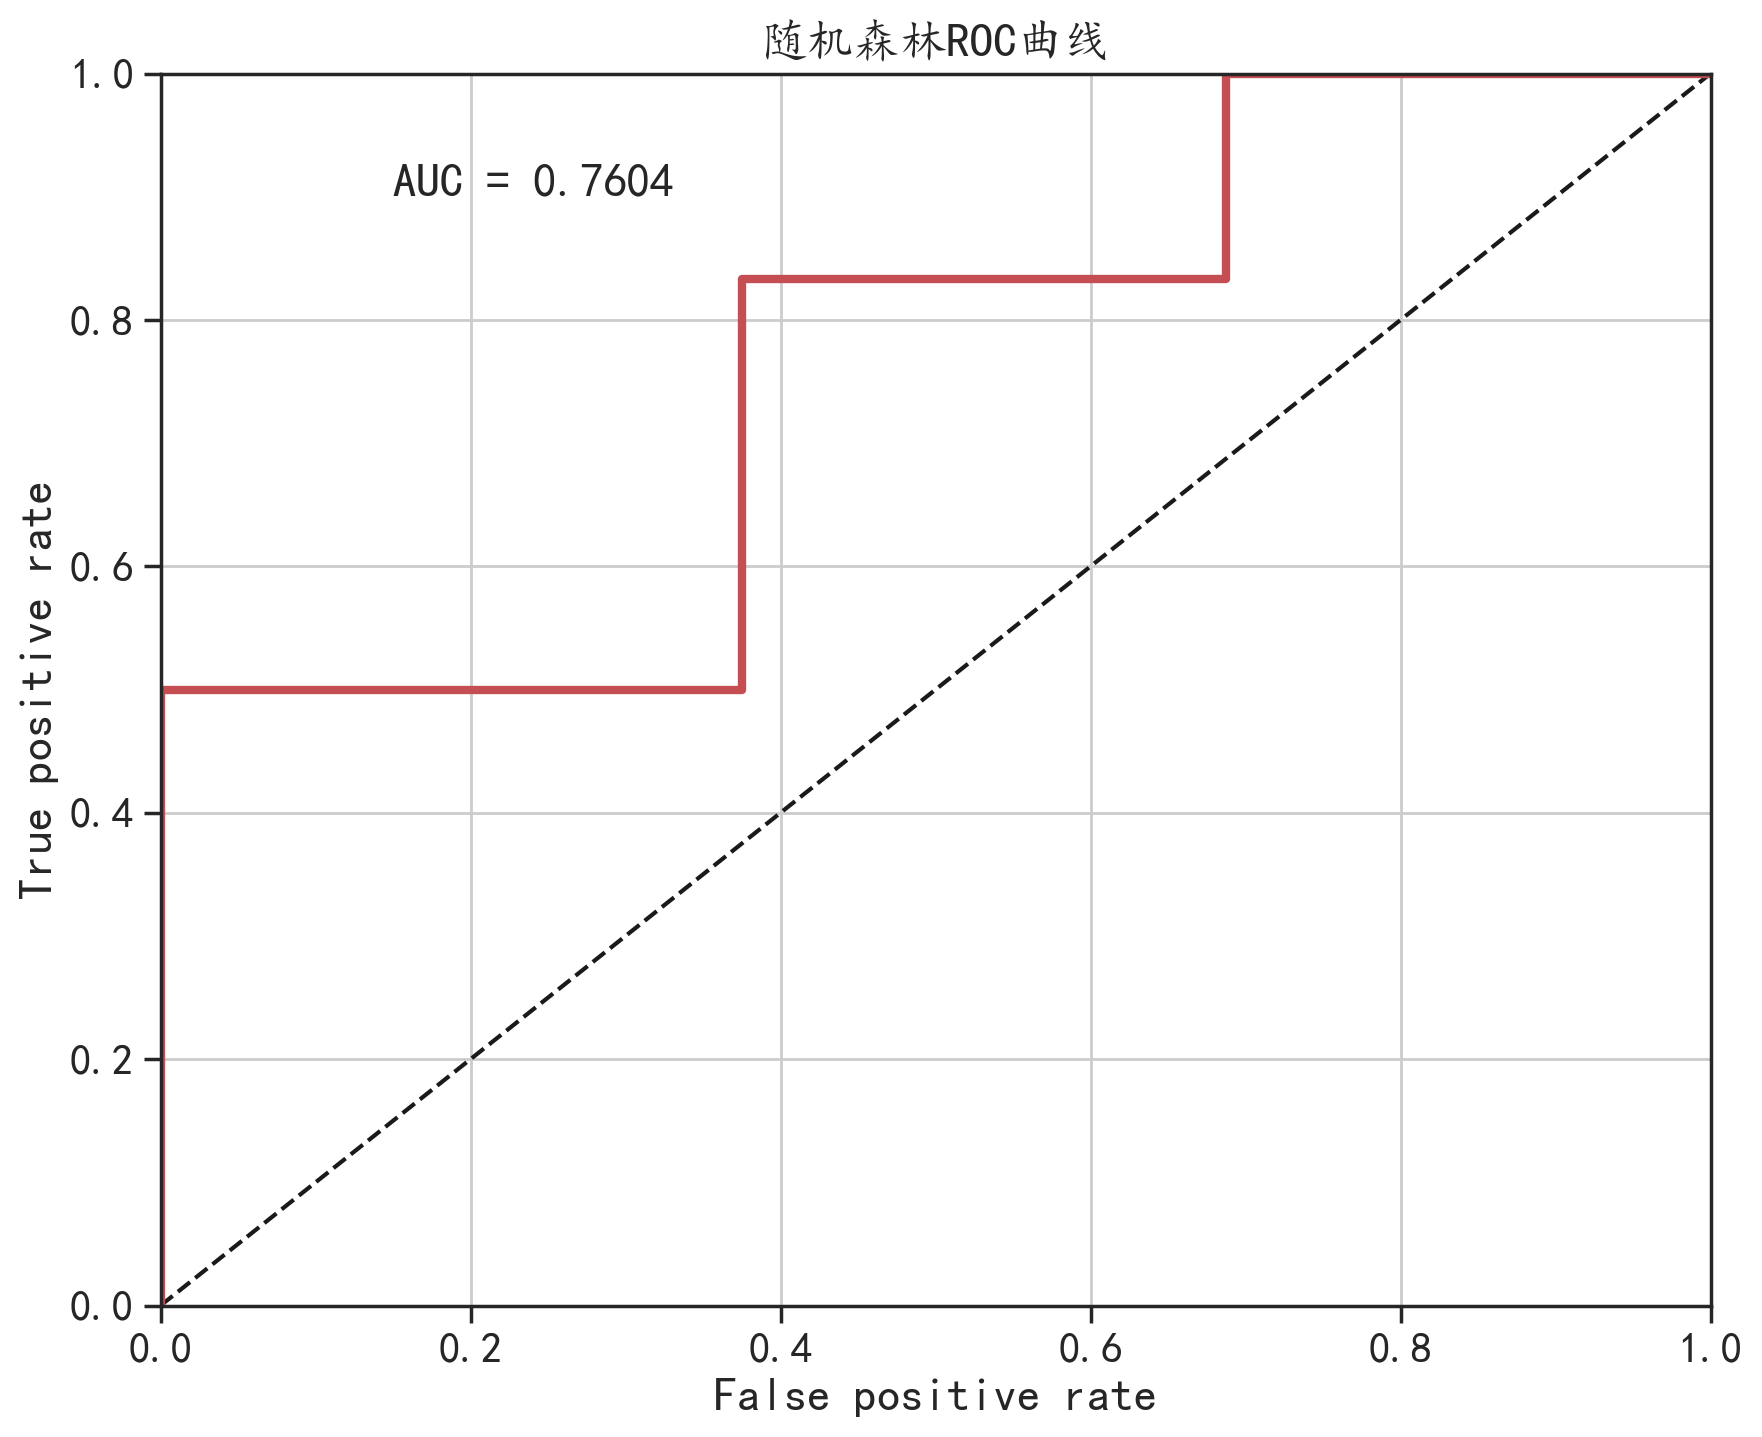

In [39]:
pre_y = rfc1.predict_proba(X_val)[:, 1]
fpr_Nb, tpr_Nb, _ = roc_curve(y_val, pre_y)
aucval = auc(fpr_Nb, tpr_Nb)    # 计算auc的取值
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Nb, tpr_Nb,"r",linewidth = 3)
plt.grid()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("随机森林ROC曲线")
plt.text(0.15,0.9,"AUC = "+str(round(aucval,4)))
plt.show()

In [40]:
aucval

0.7604166666666667

In [41]:
fpr_Nb, tpr_Nb

(array([0.    , 0.    , 0.    , 0.375 , 0.375 , 0.6875, 0.6875, 1.    ]),
 array([0.        , 0.16666667, 0.5       , 0.5       , 0.83333333,
        0.83333333, 1.        , 1.        ]))

In [42]:
importances = rfc1.feature_importances_
print(importances)

[0.10239047 0.13491743 0.08661303 0.12362375 0.08813428 0.11230878
 0.14790684 0.09769921 0.10640621]


In [43]:
indices = np.argsort(importances)[::-1]

In [44]:
feat_labels = train_x

In [45]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 60,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) AvgCurvature                                                 0.147907
 2) width                                                        0.134917
 3) length/width                                                 0.123624
 4) width/height                                                 0.112309
 5) Ellipticity                                                  0.106406
 6) length                                                       0.102390
 7) Sphericity                                                   0.097699
 8) height/length                                                0.088134
 9) height                                                       0.086613
